### 데이터를 조금 더 익숙하게 다루기 위해 학원수업 왜 동영상을 보면 추가 공부함
### 사이트  : https://www.boostcourse.org/ds112/joinLectures/28137
---

# 공공데이터 상권정보(종합병원) 분석하기
### 종합병원의 밀집도는?
### 어디에 주로 몰려있지?
---

## __1.1 필요한 라이브러이 불러오기__

In [351]:
import pandas as pd #as : a
import seaborn as sns

## __1.2 시각화를 위한 폰트 설정__

In [352]:
import matplotlib.pyplot as plt
# plt.ro("font", family = "Malgun Gothic")
# 윈도우에서 한글폰트 설정
# plt.ro("font", family = "AppleGothic")
# Mac에서 한글 폰트 설정

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## __1.3 데이터 로드하기__

In [353]:
df = pd.read_csv("소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape #행과 열의 수를 확인할 때

(91335, 39)

## __1.4 데이터 미리보기 : head, tail, sample__
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [354]:
# head 로 상위 행의 데이터 출력
# head(n) : n은 숫자 / default = 5
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955


In [355]:
# tail 로 하위 행의 데이터 출력
# tail(n) : n은 숫자 / default = 5
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [356]:
# sample : 미리보기
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
70590,24978500,왕실여성의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1165010100107830026016097,왕실빌딩,서울특별시 서초구 동작대로 172,137060.0,6559.0,NaN,2,NaN,126.983103,37.491926


## __1.5 데이터 요약하기__

### 1.5.1 요약 데이터 보기 : info()

In [357]:
# info : 정보 확인하기(메모리 사용정도, 데이터 타입, nan 등)
df.info()
# >> 아 어떤건 int고 어떤건 str이구나 
# >> 결측치가 있는 것이 많구나

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 1.5.2 데이터의 columns만 보기 : columns

In [358]:
# 컬럼명만 출력
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 1.5.3 데이터의 type만 보기 : dtypes

In [359]:
# 데이터 타입만 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## __1.6 결측치 확인하기__ 
- isnull() : true, false로 출력됨
- isnull().sum() : 각 행마다 결측치가 몇 개가 있는지 확인할 수 있음

In [360]:
nullcount = df.isnull().sum()
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

- 위에서 구한 결측치(nullcount)로 .plot.bar를 통해 막대그래프로 표현하기

<AxesSubplot:>

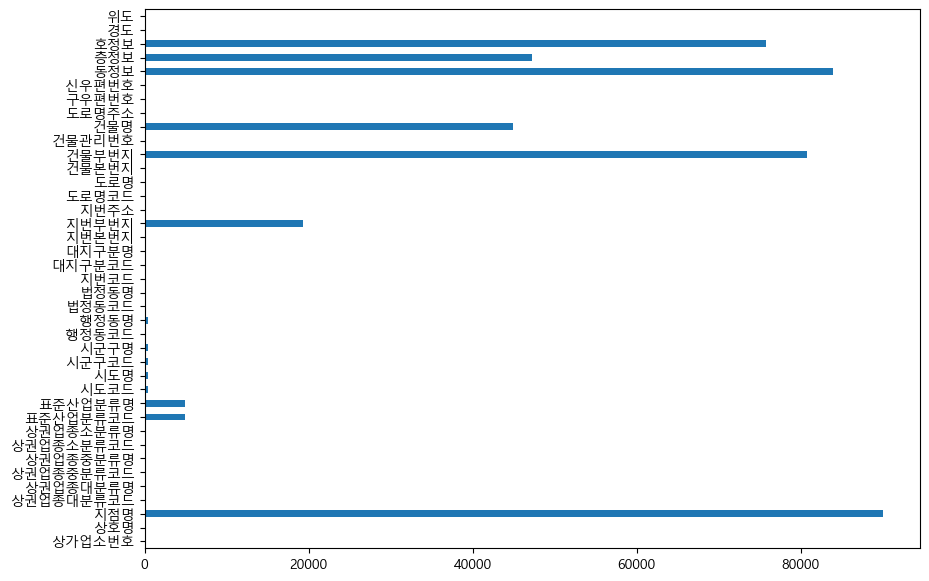

In [361]:
nullcount.plot.barh(figsize = (10,7))
# nullcount.plot(figsize = (9,5), rot=30)
# figsize = (m,n) : 그래프의 사이즈를 조정해서 겹치지 않도록 할 수 있음
# plot.~ : ~의 형태에 따라 다양한 그래프를 그릴 수 있다

# >> 아래 그래프를 통해 결측치가 어디에 많이 있는지 알 수 있음

In [362]:
nullcount.index

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [363]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 주기

df_nullcount = nullcount.reset_index()
df_nullcount.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## __1.7 컬럼명 변경하기__

In [364]:
# df_nullcount 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경하기

df_nullcount.columns = ["컬럼명", "결측치수"]
df_nullcount.head(4)

# # 원하는 컬럼만 바꾸고 싶을 때
# df_nullcount.rename( columns={"index" : "컬럼명", "0" : "결측치수" })

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0


## __1.8 정렬하기__
- sort_values(by = "정렬시 기준으로 하고싶은 columns", ascending = True or False)

In [365]:
# df_nullcount 데이터프레임에 있는 결측치 컬럼을 sort_values 를 통해 정렬하고
# 결측치가 많은 순으로 상위 10개만 출력하기

df_nullcount_count_top = df_nullcount.sort_values(by="결측치수", ascending=False).head(10)
df_nullcount.sort_values(by="결측치수", ascending=False).head(10)

# >> 결측치를 어떻게 다루느냐에 따라 데이터 분석 결과에 영향을 준다
# >> 결측치가 결과에 영향을 준다 하면 그대로 두고
# >> 결측치가 큰 영향을 주지 않는데, 메모리가 커서 결과 도출까지 오래 걸리면 제거하는 것이 방법이 된다.

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


## __1.9 특정 컬럼만 불러오기__
- NaN = Not a Number로 결측치 의미

In [366]:
df["지점명"]

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [367]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 할당하기
drop_columns = df_nullcount_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [368]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져오기
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## __1.10 제거하기__
- drop([원하는 컬럼], axis = 1(행) or 0(열))

In [369]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## __1.11 기초통계값 보기__

### __1.11.1 기초 통계 수치__
- 평균값 : df.mean()
- 중앙값 : df.median()
- 최댓값 : df.max()

In [371]:
# 평균값
df["위도"].mean()

36.62471119236673

In [372]:
# 중앙값
df["위도"].median()

37.2346523177033

In [373]:
# 최대값 , 최소값
df["위도"].max()
df["위도"].min()

33.2192896688307

In [374]:
# 개수 : 비어있는 값을 제외하고 세줌
df["위도"].count()

91335

### __1.11.2 기초통계값 요약 : describe()__
- describe을 사용해서 요약본을 볼 수 있다.
- 평균, 표준편차, 최소값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값 

In [375]:
# 위도를 describe로 요약하기
df.위도.describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [376]:
# 2개의 컬럼 요약하기
df[['위도', '경도']].describe()

# 위도 max값이 38.499 38선까지.
# 지도에 중심을 잡을 때, 평균값을 사용해서 중심을 둘 수 있음!

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [377]:
df.describe(include="object")
# 문자열에 대한 요약
# top은 가장 많이 등장하는 것, 
# freq은 top이 몇 번 등장하지
# 결측치는 제외하고 보여준다

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### __1.11.3 중복제거한 값 보기__
- unique로 중복을 제거한 값을 보고 nunique로 개수 세기

In [378]:
df.상권업종대분류명.unique()

array(['의료'], dtype=object)

In [379]:
# 유니크 값 개수 세기
df.상권업종대분류명.nunique()

1

In [380]:
df.상권업종중분류명.unique()
df.상권업종중분류명.nunique() 

5

In [381]:
df.상권업종소분류명.unique()
df.상권업종소분류명.nunique() 

34

### __1.11.4 그룹화된 요약값 보기_value_counts__
- 카테고리 형태의 데이터 개수를 세어볼 수 있음

In [382]:
# 시도명 세기
df["시도명"].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [383]:
# 시도명을 세서, 비율을 구함(normalize=True)
city_normalize = df["시도명"].value_counts(normalize=True) 
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

### __1.11.5 그래프 그리기(barh, pie, bar)__

<AxesSubplot:>

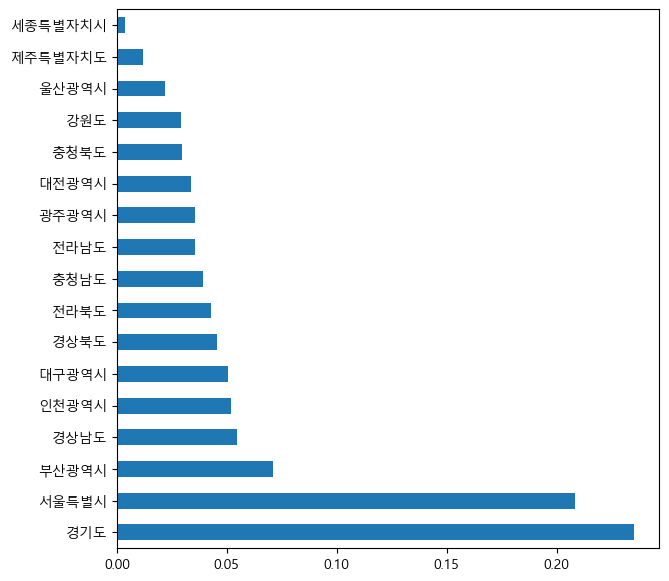

In [384]:
# 가로막대그래프 그리기
city_normalize.plot.barh(figsize=(7, 7))

<AxesSubplot:ylabel='시도명'>

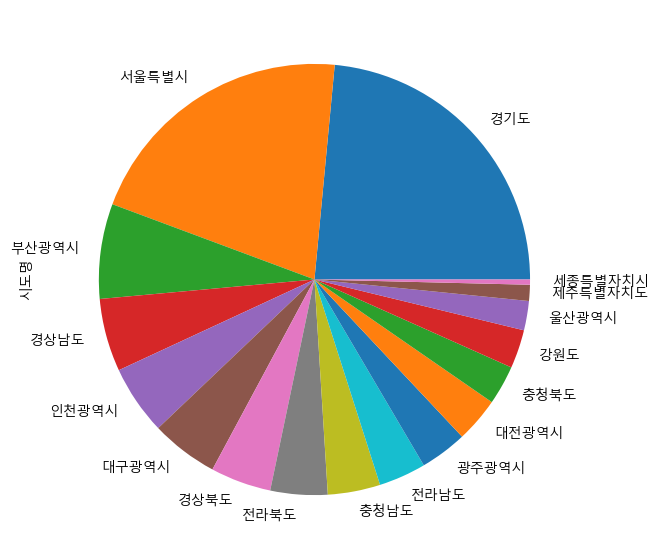

In [385]:
# 파이 그리기
city_normalize.plot.pie(figsize=(7, 7))

<AxesSubplot:xlabel='count', ylabel='시도명'>

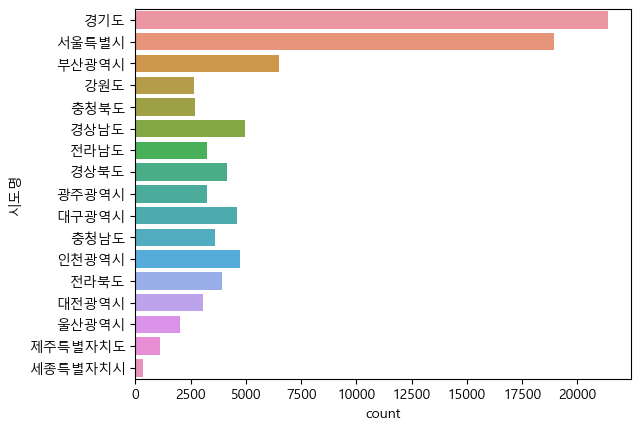

In [386]:
# seaborn countplot 그리기
c = sns.countplot(data= df, y = "시도명")
c
# seaborn은 데이터가 많을수록 로딩이 느리다. 대신 색감이 좋다.

In [387]:
# 상권업종대분류명으로 개수 세기
df.상권업종대분류명.value_counts()

# 상권업종중분류명으로 개수 세기
c = df.상권업종중분류명.value_counts()

# 상권업종중분류명으로 개수 세서 비율화하기
n = df.상권업종중분류명.value_counts(normalize=True)

<AxesSubplot:>

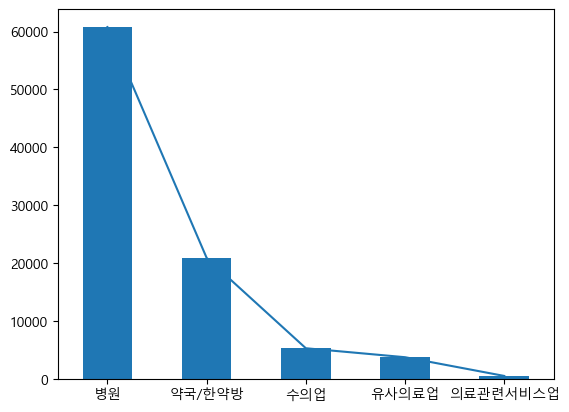

In [388]:
c.plot()
c.plot.bar(rot = 0)

# 병원, 약국/한약방 등 순으로 많음

<AxesSubplot:ylabel='상권업종중분류명'>

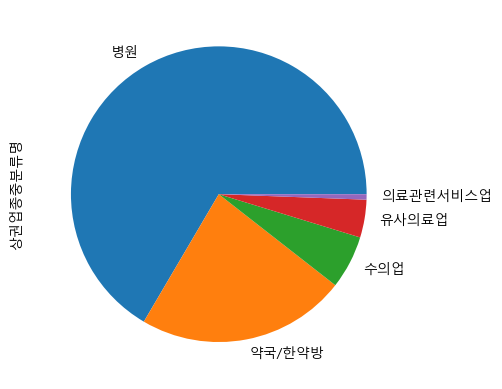

In [389]:
n.plot.pie()

<AxesSubplot:>

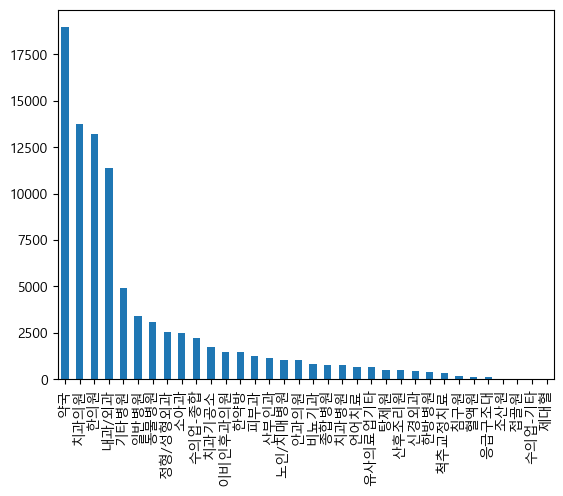

In [390]:
c = df["상권업종소분류명"].value_counts()
c.plot.bar()

<AxesSubplot:>

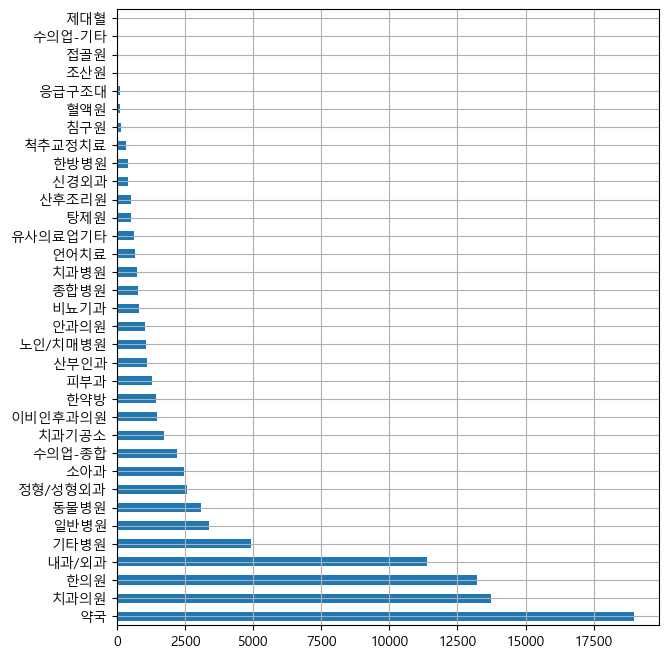

In [391]:
# 눈금은 grid = True
c.plot.barh(figsize=(7,8), grid=True)

## __1.12 데이터 전처리__

### __1.12.1 데이터 색인하기__
- 특정 데이터 모아서 따로 보기

In [392]:
# 상권업종둥분류명이 약국/한약방인 데이터만 가져와서
# df_medical 이라는 변수에 담아보기
# 그리고 head()로 미리보기

df_medical = df[df['상권업종중분류명'] == "약국/한약방"].copy()
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,강원도,42110.0,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,충청북도,43111.0,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,경상남도,48890.0,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,전라남도,46830.0,...,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [393]:
# 상권업종대분류명이 의료인 데이터의 상권업종중분류명을 가져오기
df[df.상권업종대분류명 == "의료"].상권업종중분류명 #데이터를 2번 접근해서 속도가 조금 느림

df.loc[df.상권업종대분류명 == "의료" , "상권업종중분류명"]

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [394]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
df_seoul_drug = df[
    (df["상권업종소분류명"] == "약국") & 
    (df["시도명"]== "서울특별시")]
df_seoul_drug.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


### __1.12.2 구별로 보기__

In [395]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세기
c = df_seoul_drug["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

<AxesSubplot:>

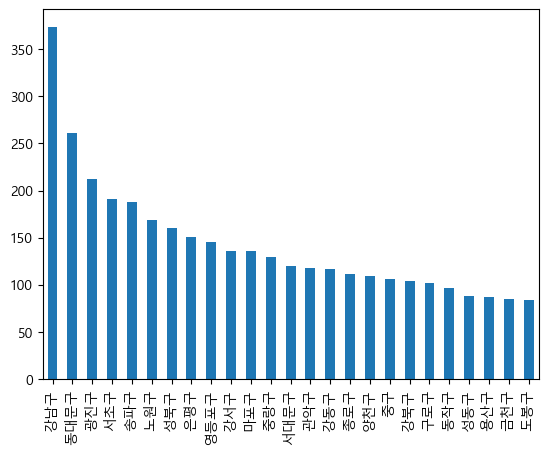

In [396]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 r그리기
c.plot.bar()
# 어느 구가 가장 많은지 알 수 있음

In [397]:
# 서울에 종합병원이 어느 한 지역에 몰려있는지, 어디에 없는지 알고 싶음
df[df.상권업종소분류명 == "종합병원"].head()
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") &
                     (df["시도명"] == "서울특별시")].copy()

# 시구군명 으로 그룹화해서 구별로 종합병원의 수 세기
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

### __1.12.3 덱스트 데이터 색인하기__

In [398]:
# 색인하기 전에 "상호명" 중에 "종합병원"이 아닌 데이터를 찾기

df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"),
                       "상호명"].unique() 

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [399]:
# 상호명이 꽃배달이 들어가는 거 가져오기 

df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]
df_seoul_hospital.loc[df_seoul_hospital["상호명"].str.contains("꽃배달"), "상호명"]

df_seoul_hospital.loc[df_seoul_hospital["상호명"].str.contains("의료기"), "상호명"]

# 여러개의 단어 찾기
out_word = "꽃배달|의료기|장례식장|상담소|어린이집|의원|우울증|협회|연구소|여객|마취"
df_seoul_hospital.loc[df_seoul_hospital["상호명"].str.contains(out_word), "상호명"]

# 원하지 않는 단어의 인덱스를 리스트로 뽑아서 drop_row에 저장하기
drop_row = df_seoul_hospital.loc[df_seoul_hospital["상호명"].str.contains(out_word)
                                , "상호명"].index.to_list()
drop_row
len(drop_row)


38

In [400]:
# 해당하는 셀을 삭제하고 삭제 전,후 행의 개수 비교
# 행기준 삭제 : 0
# 열기준 삭제 : 1

print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis = 0)
print(df_seoul_hospital.shape)

(91, 29)
(53, 29)


<AxesSubplot:xlabel='count', ylabel='시군구명'>

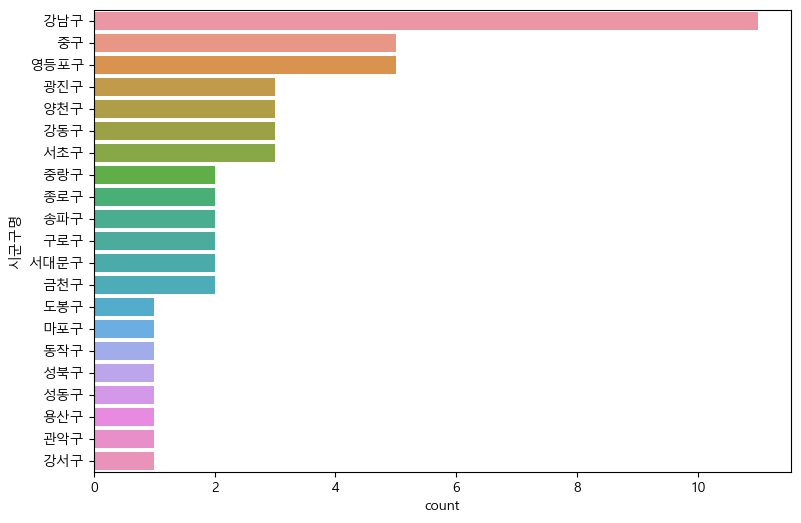

In [401]:
# seaborn 의 countplot 을 사용해서 df_seoul_hospital를
# 시군구명을 시각화
plt.figure(figsize=(9, 6))
sns.countplot( data = df_seoul_hospital
                , y="시군구명"
                , order = df_seoul_hospital.시군구명.value_counts().index )

In [415]:
df_seoul_hospital["상호명"]
# 혹시 원하지 않는 데이터가 들어있는지 한 번 더 확인하기

305               대진의료재단
353               홍익병원별관
385                 SNUH
2461                  한양
2687          백산의료재단친구병원
2801              서울보훈병원
4285             서울대학교병원
4856                제일병원
5005              이랜드클리닉
5089            사랑나눔의료재단
5824              성심의료재단
5867              다나의료재단
6978            서울아산병원신관
8706           고려대학교구로병원
9529            학교법인일송학원
10937     희명스포츠의학센터인공신장실
10958    연세대학교의과대학강남세브란스
11314             국립정신병원
11834              코아클리닉
14133       한국전력공사부속한일병원
14928             신촌연세병원
15521           영동세브란스병원
16678        삼성의료재단강북삼성태
16844          서울시립보라매병원
18818      서울대학교병원비상계획외래
19102       평화드림서울성모병원의료
19438               홍익병원
19576          사랑나눔의료재단서
21391              우신향병원
23422             동부제일병원
24375           아산재단금강병원
25917         아산재단서울중앙병원
27751        삼성생명공익재단삼성서
28248          성광의료재단차병원
28539       정해복지부설한신메디피아
28997             성베드로병원
30648             성애의료재단
40342             영남의료재단
43078         인제대학교서울백병원
44681            한국필의료재단


### __1.12.4 특정 지역만 보기__

In [419]:
# df_seoul 이라는 데이터 프레임에 저장하기

df_seoul = df[df.시도명 == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

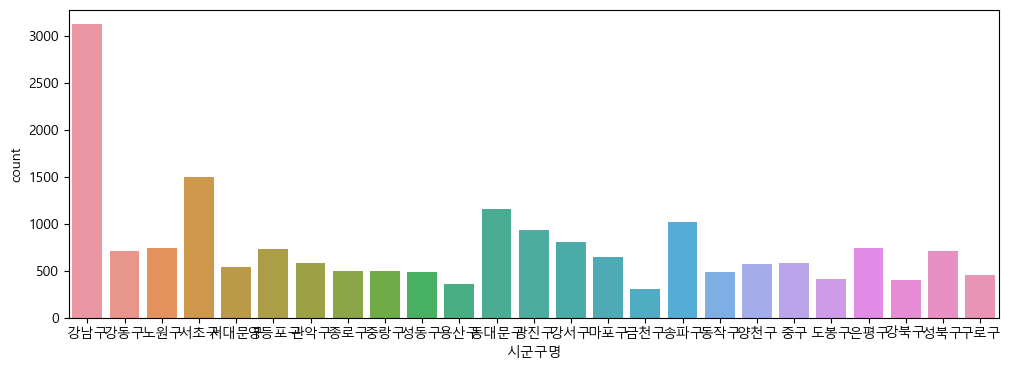

In [438]:
# seaborn의 countplot을 사용해서 위에서 만든 df_seoul을 "시군구명"으로 시각화하기
plt.figure(figsize = (12,4))
sns.countplot(data=df_seoul, x="시군구명")
plt.show()

### __1.12.5 Scatter로 지도형태 나타내기__

<AxesSubplot:xlabel='경도', ylabel='위도'>

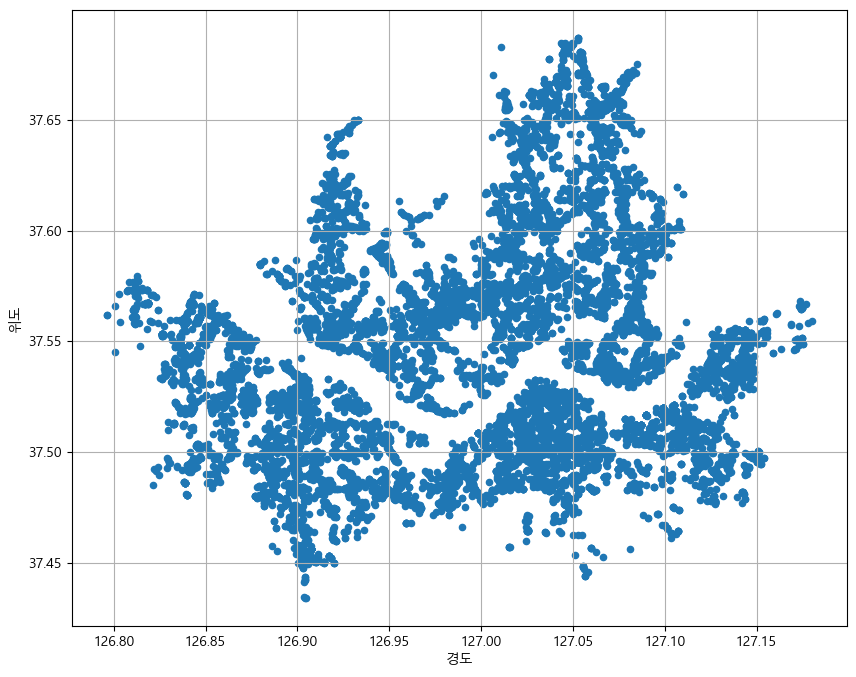

In [444]:
# scatterplot 그리기(위도, 경도)
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도"
                                                    , y = "위도"
                                                    , figsize = (10,8)
                                                    , grid = True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

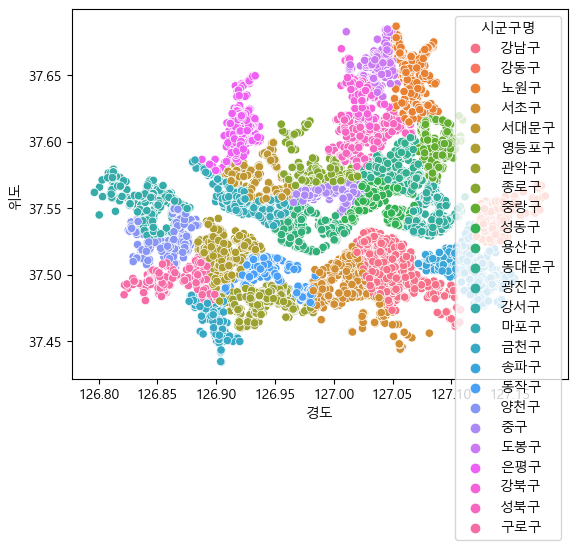

In [446]:
plt.plot(figsize = (10,8))
sns.scatterplot(data=df_seoul, x = "경도", y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

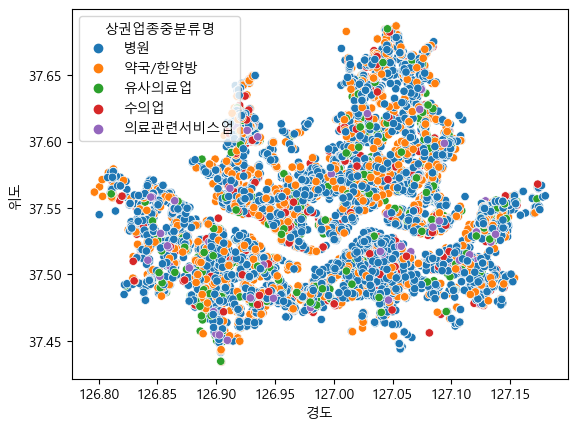

In [448]:
plt.plot(figsize = (10,8))
sns.scatterplot(data=df_seoul, x = "경도", y="위도", hue="상권업종중분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

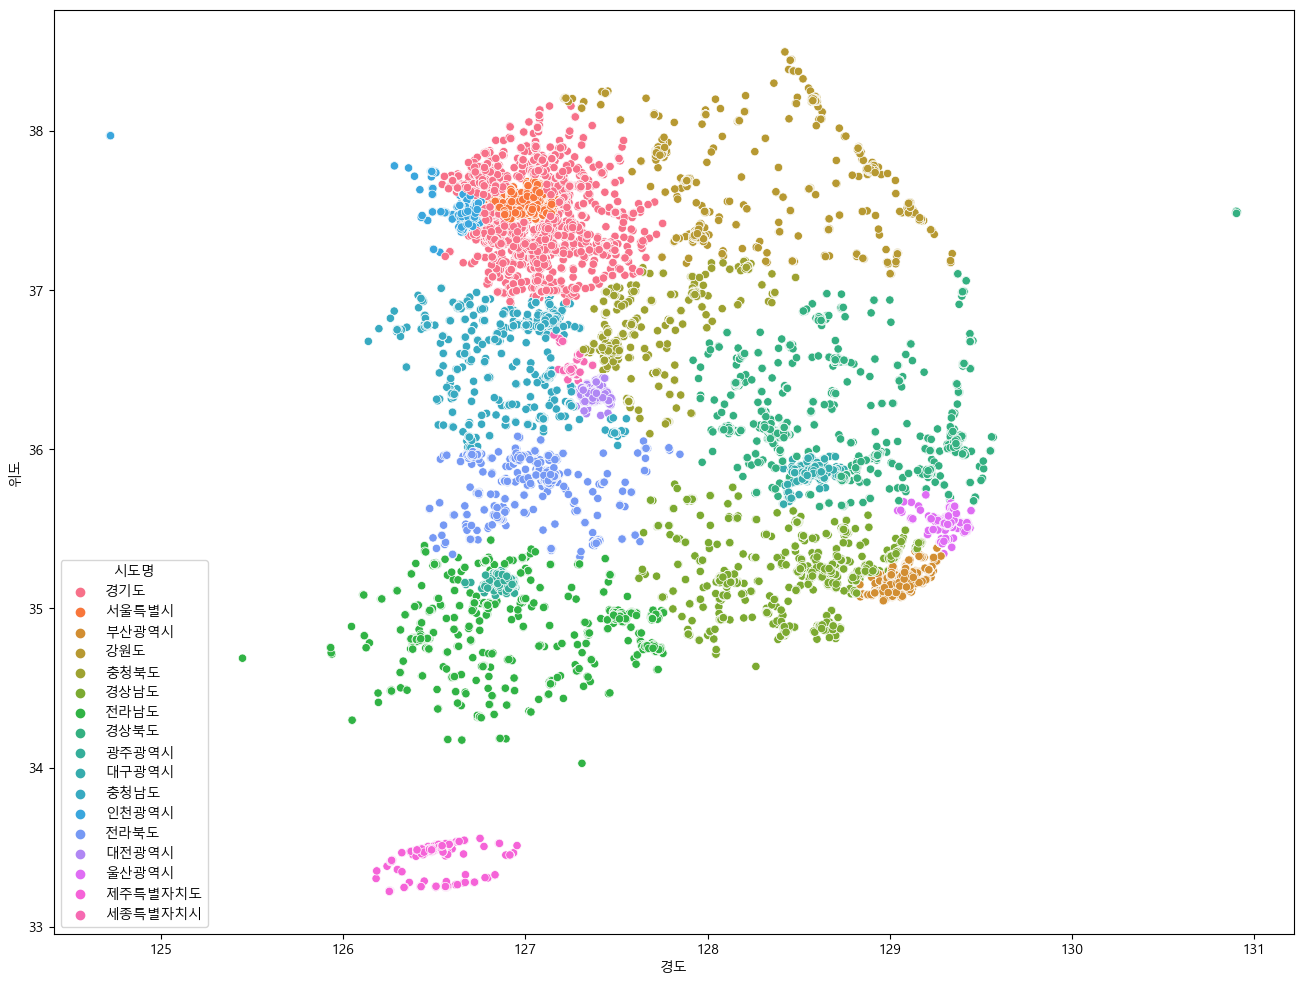

In [453]:
plt.figure(figsize = (16,12))
sns.scatterplot(data=df, x = "경도", y="위도", hue="시도명")

### __1.12.6 Folium에 나타내기__

In [455]:
import folium
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.99742934142226

In [460]:
# map = folium.Map(
#                 location=[ 
#                     df_seoul_hospital["위도"].mean()
#                     ,df_seoul_hospital["경도"].mean()
#                     ]
#                 , zoom_start=1)

# folium.Marker에 들어갈 변수를 만드는 작업
for n in df_seoul_hospital.index:
    # 팝업에 상호명과 도로명주소 모두 넣고 싶음
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"

    # 위치 : 위도와 경도를 리스트로
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]

    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)

map

# OLS Example

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [406]:
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = duncan_prestige.data['income']
X = duncan_prestige.data['education']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [407]:
results.params

const        10.603498
education     0.594859
dtype: float64

In [408]:
np.linalg.inv(X.T@X)@X.T@Y

0    10.603498
1     0.594859
dtype: float64

In [409]:
results.tvalues

const        2.039813
education    6.892802
dtype: float64

In [410]:
results.pvalues

const        4.754253e-02
education    1.839946e-08
dtype: float64

In [411]:
results.rsquared

0.5249181546907553

In [412]:
results.rsquared_adj

0.5138697396835635

In [413]:
X_tmp = np.array([np.ones(100), np.arange(0,100)]).T
X_tmp.shape

(100, 2)

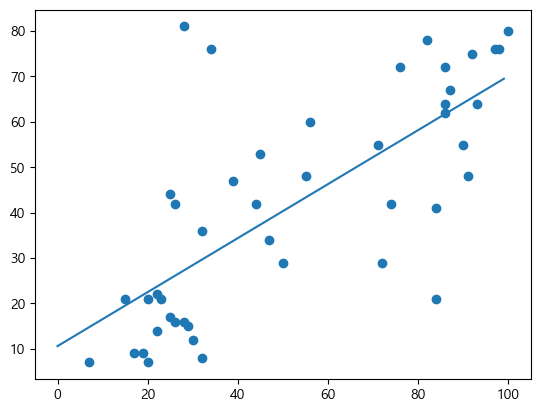

In [414]:
plt.figure()
plt.scatter( X.iloc[:,1], Y)
plt.plot(X_tmp@results.params) # (100, 2) * (2, 1)